In [1]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tifffile 2022.10.10 requires numpy>=1.19.2, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [2]:
import numpy as np
import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context
import OpenGL.GL as gl
from OpenGL.GLU import *
WIDTH, HEIGHT = 1200,700
create_opengl_context((WIDTH, HEIGHT))
print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [3]:
#@title Function Definitions
def add_vertex(x,y):
    gl.glVertex2f(x/(WIDTH/2),y/(HEIGHT/2))
gl.glPointSize(3) 
gl.glColor3f(.5, .7, 1)

def color(x,y,z):
  gl.glColor3f(x/250, y/250, z/250)

#MIDPOINT LINE
def FindZone(x1,y1,x2,y2):  
    dx = x2 - x1
    dy = y2 - y1
    if (abs(dx) >= abs(dy)):
        if(dx>=0 and dy>=0):
            Zone=0
        elif (dx<0 and dy>=0):
            Zone = 3
        elif (dx < 0 and dy < 0):
            Zone = 4
        elif (dx > 0 and dy < 0):
            Zone = 7
    else:
        if (dx >= 0 and dy > 0):
            Zone = 1
        elif (dx < 0 and dy > 0):
            Zone = 2
        elif (dx < 0 and dy < 0):
            Zone = 5
        elif (dx >= 0 and dy < 0):
            Zone = 6
    return Zone

def OtherToZero(l,zone):
    if zone==0:
        pass
    elif zone == 1:
        for i in l:
            i[0], i[1] = i[1], i[0]
    elif zone == 2:
        for i in l:
            i[0], i[1] = i[1], -i[0]
    elif zone ==3:
        for i in l:
            i[0], i[1] = -i[0], i[1]
    elif zone == 4:
        for i in l:
            i[0], i[1] = -i[0], -i[1]
    elif zone == 5:
        for i in l:
            i[0], i[1] = -i[1], -i[0]
    elif zone == 6:
        for i in l:
            i[0], i[1] = -i[1], i[0]
    elif zone == 7:
        for i in l:
            i[0], i[1] = i[0], -i[1]
    return l

def ToOtherZone(l,zone):
    if zone==0:
        pass
    elif zone == 1:
        for i in l:
            i[0], i[1] = i[1], i[0]
    elif zone == 2:
        for i in l:
            i[0], i[1] = -i[1], i[0]
    elif zone ==3:
        for i in l:
            i[0], i[1] = -i[0], i[1]
    elif zone == 4:
        for i in l:
            i[0], i[1] = -i[0], -i[1]
    elif zone == 5:
        for i in l:
            i[0], i[1] = -i[1], -i[0]
    elif zone == 6:
        for i in l:
            i[0], i[1] = i[1], -i[0]
    elif zone == 7:
        for i in l:
            i[0], i[1] = i[0], -i[1]
    for i in l:
        a, b = i[0], i[1]
        gl.glBegin(gl.GL_POINTS)
        add_vertex(a, b)
        gl.glEnd()

def DrawLine(x1, y1, x2, y2):
    zone = FindZone(x1, y1, x2, y2)
    lst = [[x1, y1], [x2, y2]]
    lst = OtherToZero(lst, zone)
    x1,y1,x2,y2 = lst[0][0], lst[0][1], lst[1][0], lst[1][1]
    dx = x2 - x1
    dy = y2 - y1
    d = 2*dy - dx
    incE = 2*dy
    incNE = 2*(dy - dx)
    y = y1
    l=[]
    for i in range(x1, x2+1):
        if y<=y2:
            l.append([i, y])
            if (d>0):
                d = d + incNE
                y = y + 1
            else:
                d = d + incE
    return ToOtherZone(l,zone)

#MIDPOINT CIRCLE
def draw_points(x, y, p_no):
        if p_no == 0:
            gl.glColor3f(0.9, 0.8, 0.6)
            lst_shooter_op.append([[x],[y],[1]])
        elif p_no == 1:
            gl.glColor3f(0.9, 0.8, 0.6)
            lst_gk_op.append([[x],[y],[1]])
        cir_list.append([[x],[y],[1]])
        gl.glPointSize(7) 
        gl.glBegin(gl.GL_POINTS)
        add_vertex(x,y)
        gl.glEnd()

def convertZone(x, y, X, Y, p_no):
    draw_points(x + X, y + Y, p_no)
    draw_points(y + X, x + Y, p_no)
    draw_points(y + X, -x + Y, p_no)
    draw_points(-x + X, y + Y, p_no)
    draw_points(-x + X, -y + Y, p_no)
    draw_points(-y + X, -x + Y, p_no)
    draw_points(-y + X, x + Y, p_no)
    draw_points(x + X, -y + Y, p_no)

def midPointCircle(X, Y, r, p_no):
    d = 1 - r
    x = 0
    y = r
    convertZone(x, y, X, Y, p_no)
    while x <= y:
        x += 1
        if d < 0:d += 2 * x + 3
        else:
            y -= 1
            d += 2 * (x - y) + 5
        convertZone(x, y, X, Y, p_no)  

def drawCircles(X, Y, R,N, p_no=None):
    midPointCircle(X, Y, R, p_no)

#BALL
def ball(X, Y, R, N, p_no=None):
    color(250, 247, 247)
    midPointCircle(X, Y, R, p_no)
    each = 360/N
    deg=0
    while deg<=360:
        midPointCircle(X+(R/2)*math.cos(math.radians(deg)), Y+(R/2)*math.sin(math.radians(deg)), R/2, p_no)
        deg+=each

#SCOREBOARD FUNCTIONS
def miss(x):
    gl.glPointSize(3)
    gl.glColor3f(1,0,0)
    a=0
    if x==0:
        a=0
    elif x==1:
        a=25
    elif x==2:
        a=50
    elif x==3:
        a=75
    else:
        a=100
    DrawLine(-570+a,305,-555+a,320)
    DrawLine(-570+a,320,-555+a,305)

def score(x):
    gl.glPointSize(3)
    gl.glColor3f(.28,.78,.12)
    a=0
    if x==0:
        a=0
    elif x==1:
        a=25
    elif x==2:
        a=50
    elif x==3:
        a=75
    else:
        a=100
    DrawLine(-565+a,305,-555+a,320)
    DrawLine(-565+a,305,-570+a,314)

def score_draw(lst):  # prints the score
    for i in range (0,len(lst)):
        if lst[i]==0:
            miss(i)
        else:
            score(i)

#PLAYER AND THE GOAL KEEPER
def mid_point(x1, y1, x2, y2, part, n): 
        dx = x2 - x1
        dy = y2 - y1
        zone = find_zone(dx, dy)
        x1, y1, = convert_zone0(x1, y1, zone)
        x2, y2 = convert_zone0(x2, y2, zone)
        mod_dx = x2 - x1
        mod_dy = y2 - y1
        d = 2 * mod_dy - mod_dx
        ne = 2 * mod_dy - 2 * mod_dx
        e = 2 * mod_dy
        x = x1
        y = y1
        while x <= x2:
            if d > 0:
                d += ne
                x += 1
                y += 1
            else:
                d += e
                x += 1
            x_bar, y_bar = original_zone(x, y, zone)
            draw_pixel(x_bar, y_bar, part, n)

def find_zone(dx, dy):
        if abs(dx) > abs(dy):
            if dx > 0 and dy > 0:
                zone = 0
            elif dx < 0 and dy > 0:
                zone = 3
            elif dx < 0 and dy < 0:
                zone = 4
            else:
                zone = 7
        else:
            if dx > 0 and dy > 0:
                zone = 1
            elif dx < 0 and dy > 0:
                zone = 2
            elif dx < 0 and dy < 0:
                zone = 5
            else:
                zone = 6
        return zone


def convert_zone0(x1, y1, zone):
        if zone == 0:
            x1, y1 = x1, y1
        elif zone == 1:
            x1, y1 = y1, x1
        elif zone == 2:
            x1, y1 = y1, -x1
        elif zone == 3:
            x1, y1 = -x1, y1
        elif zone == 4:
            x1, y1 = -x1, -y1
        elif zone == 5:
            x1, y1 = -y1, -x1
        elif zone == 6:
            x1, y1 = -y1, x1
        elif zone == 7:
            x1, y1 = x1, -y1
        return x1, y1


def original_zone(x1, y1, zone):
        if zone == 0:
            x1, y1 = x1, y1
        elif zone == 1:
            x1, y1 = y1, x1
        elif zone == 2:
            x1, y1 = -y1, x1
        elif zone == 3:
            x1, y1 = -x1, y1
        elif zone == 4:
            x1, y1 = -x1, -y1
        elif zone == 5:
            x1, y1 = -y1, -x1
        elif zone == 6:
            x1, y1 = y1, -x1
        elif zone == 7:
            x1, y1 = x1, -y1
        return x1, y1

def draw_pixel(x1, y1, part, n):
        if part == "body":  
            if n == 1:  #gk body
                lst_gk_body.append([[x1],[y1],[1]])
                gl.glColor3f(0, 0.7, 0.8)
            else:
                lst_shooter_body.append([[x1],[y1],[1]])
                # gl.glColor3f(1, 0, 0)
                color(245, 146, 110)
            gl.glPointSize(10)
            gl.glBegin(gl.GL_POINTS)
            add_vertex(x1, y1)
            gl.glEnd()
        if part == "hand":
            if n == 1:  
                lst_gk_op.append([[x1],[y1],[1]])
            else:
                lst_shooter_op.append([[x1],[y1],[1]])
            gl.glPointSize(5)
            gl.glBegin(gl.GL_POINTS)
            gl.glColor3f(0.9, 0.8, 0.6)
            add_vertex(x1, y1)
            gl.glEnd()
        if part == "pant":
            if n == 1:  
                lst_gk_pant.append([[x1],[y1],[1]])
            else:
                lst_shooter_pant.append([[x1],[y1],[1]])
            gl.glPointSize(5)
            gl.glBegin(gl.GL_POINTS)
            gl.glColor3f(0, 0.6, 0.6)
            add_vertex(x1, y1)
            gl.glEnd()
        if part == "leg":
            if n == 1:  
                lst_gk_op.append([[x1],[y1],[1]])
            else:
                lst_shooter_op.append([[x1],[y1],[1]])
            gl.glPointSize(5)
            gl.glBegin(gl.GL_POINTS)
            gl.glColor3f(0.9, 0.8, 0.6)
            add_vertex(x1, y1)
            gl.glEnd()
        


def human_figure(hx, hy, r, solid, n):
        figure_width = 6 * r // 2
        # figure_width = 100
        # figure_height = 150
        # figure_hand_width = 25
        # figure_hand_height = 100   
        figure_height = figure_width + 50
        gk_hand_height = figure_height // 3
        figure_hand_width = figure_width // 4
        figure_hand_height = 2 * figure_height // 3
        x1, y1 = hx - (figure_width // 2), hy - r  # body initial
        x2, y2 = x1 + figure_width, y1  # body range
        x3, y3 = x1 - 5, y1 - 10  # shooter left hand initial
        x4, y4 = x3 - figure_hand_width, y1 - 20  # shooter left hand range
        x6, y6 = x2 + 5, y3  # shooter right hand initial
        x7, y7 = x6 + figure_hand_width, y3  # shooter right hand range
        x5, y5 = x1 + 5, y3 - 20  # gk left hand initial
        x8, y8 = x2 + 5, y3 - 20  # gk right hand initial
        figure_body_range = y1 - figure_height
        pant_length = figure_width // 2
        leg_start_x = figure_body_range - pant_length + 5
        # leg_length = 100
        # leg_width = 40
        leg_length = figure_width
        leg_width = 2 * figure_width // 5
        if n == 0:
            for l_hand in range(y3, y3 - figure_hand_height, -2):
                part = "hand"
                mid_point(x4, l_hand + 8, x3, l_hand + 8, part, n)
            for r_hand in range(y6, y6 - figure_hand_height, -2):
                part = "hand"
                mid_point(x6, r_hand + 8, x7 - 5, r_hand + 8, part, n)
        if n == 1:
            for l_hand in range(1, gk_hand_height):
                part = "hand"
                mid_point(int(x5 - 10 - l_hand), y5 + l_hand + 15, int(x1 + 2 - l_hand), y1 + l_hand - 10, part, n)
            for r_hand in range(1, gk_hand_height):
                part = "hand"
                mid_point(int(x8 + r_hand), y8 + r_hand + 15, int(x2 + r_hand), (y2 + r_hand - 10), part, n)
        for body in range(y1, figure_body_range, -5):
            part = "body"
            mid_point(x1, body, x2, body, part, n)
        for pant in range(figure_body_range + 3, leg_start_x, -2):
            part = "pant"
            mid_point(x1 - 4, pant, x2 + 3, pant, part, n)
        for left_leg in range(leg_start_x, leg_start_x - leg_length, -2):
            part = "leg"
            mid_point(x1 - 4, left_leg - 4, x1 - 4 + leg_width, left_leg - 4, part, n)
        for right_leg in range(leg_start_x, leg_start_x - leg_length, -2):
            part = "leg"
            mid_point(x1 + 10 + (figure_width // 2) - 4, right_leg - 4, x2 + 3, right_leg - 4, part, n)

        ball(hx, hy, r, solid, n)
def main_func():
        head_center_x = 100
        head_center_y = -100
        human_head_radius = 10
        head_solid = 2 # no of circles
        n = 0  # shooter
        n = 1  # gk  
        human_figure(head_center_x, head_center_y, human_head_radius, head_solid, n=0) 
        human_figure(head_center_x-100, head_center_y+200, human_head_radius, head_solid, n=1)
        

#FINAL SCREEN
def win():
    gl.glPointSize(7) 
    gl.glColor3f(6/250, 12/250, 74/250)
    DrawLine(-250,100,-250,-100) #W
    DrawLine(-250,-100,-150,100) 
    DrawLine(-150,100,-50,-100)
    DrawLine(-50,-100, -50,100)

    DrawLine(0,100,0,-100) #I
    
    DrawLine(50,100,50,-100) #N
    DrawLine(50,100,150,-100)
    DrawLine(150,-100, 150, 100)

def loss():
    gl.glPointSize(7) 
    gl.glColor3f(6/250, 12/250, 74/250)
    DrawLine(-450,100,-450,-100) #L
    DrawLine(-450,-100,-300,-100)

    DrawLine(-250,-100,-100,-100) #O
    DrawLine(-250,-100,-250, 100)
    DrawLine(-100,-100, -100,100)
    DrawLine(-250, 100, -100,100)

    DrawLine(-50,100, 100,100) #S
    DrawLine(-50,100, -50, 0)
    DrawLine(-50, 0, 100,0)
    DrawLine(100,0, 100, -100)
    DrawLine(100, -100, -50,-100)

    x=200 #shifting
    DrawLine(-50+x,100, 100+x,100) #S
    DrawLine(-50+x,100, -50+x, 0)
    DrawLine(-50+x, 0, 100+x,0)
    DrawLine(100+x,0, 100+x, -100)
    DrawLine(100+x, -100, -50+x,-100)

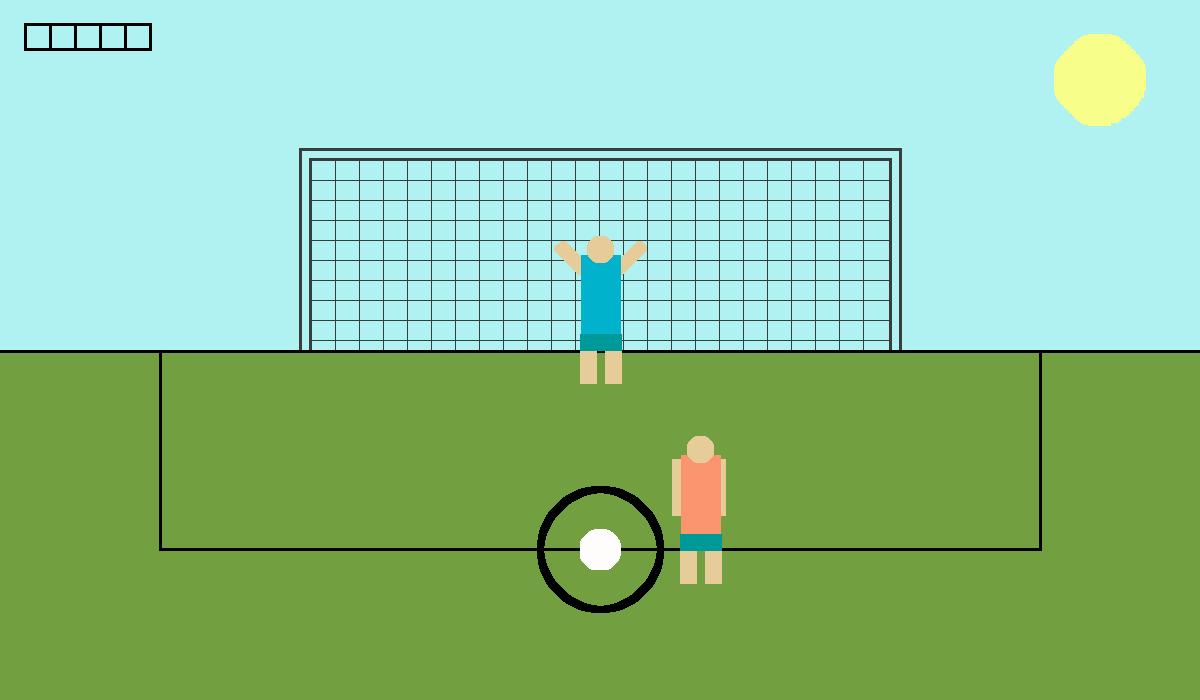

In [4]:
#@title Initial Frame
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
from IPython.display import display
import math
from PIL import Image
import time

gl.glClear(gl.GL_COLOR_BUFFER_BIT)

lst_gk_op = []
lst_gk_body = []
lst_gk_pant = []
lst_shooter_op = []
lst_shooter_body = []
lst_shooter_pant = []

cir_list=[]

def template(n=0):
    gl.glClear(gl.GL_COLOR_BUFFER_BIT)  
    
    #ground
    y=0
    left_x, right_x = -600, 600
    #gl.glColor3f(.74, 1, .684)
    color(112, 156, 63)
    while y>=-450:
        DrawLine(left_x, y, right_x,y)
        y-=3  
    
    #sky
    y=0
    left_x, right_x = -600, 600
    color(173, 237, 236)
    while y<=450:
        DrawLine(left_x, y, right_x,y)
        y+=3 

    #GOALPOST
    color(54, 59, 59)
    x=300
    DrawLine(-x, 0, -x, 200)
    DrawLine(x, 0, x, 200)
    DrawLine(-x, 200, x, 200)
    x=290
    DrawLine(-x, 0, -x, 190)
    DrawLine(x, 0, x, 190)
    DrawLine(-x, 190, x, 190)

    red=1 #goalpost net
    gl.glPointSize(.5) 
    for i in range(10):
        DrawLine(-x, 190-red, x, 190-red)  #Hori line
        red+=20
    red=1
    for i in range(24):
        DrawLine(-x+red, 0, -x+red, 190) #verti line
        red+=24
    

    # #D-BOX
    gl.glColor3f(0, 0, 0)
    gl.glPointSize(3) 
    DrawLine(-x-150, -2, -x-150, -200)
    DrawLine(x+150, -2, x+150, -200)
    DrawLine(-x-150, -200, x+150, -200)
    color(0, 0, 0)
    DrawLine(-600, -2, 600, -2)

    #Score Board
    DrawLine(-575,325,-450,325)
    DrawLine(-450,300,-450,325)
    DrawLine(-575,300,-450,300)
    DrawLine(-575,300,-575,325)
    DrawLine(-550,300,-550,325)
    DrawLine(-525,300,-525,325)
    DrawLine(-500,300,-500,325)
    DrawLine(-475,300,-475,325) 

    drawCircles(0, -200, 60, 100) #goal position to keep ball

    if n==1:
        gl.glColor3f(1, 1, 1)
        ball(0, -200, 17, 150) #the ball

    # sun
    a,b = 500,770
    trans = np.array([[2.5, 0, a],
                    [0, 2.5, b],
                    [0, 0, 1]])    
    
    goaled = np.matmul(trans,cir_list[344::]) # football
    for i in goaled[:6600:]:
        color(242, 250, 135)
        gl.glBegin(gl.GL_POINTS)
        add_vertex(i[0][0],i[1][0])
        gl.glEnd()

    if n == 1:
        main_func()

template(1) #1 means 1st display with ball

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

Select 1-5: 5
Height (1-170): 2


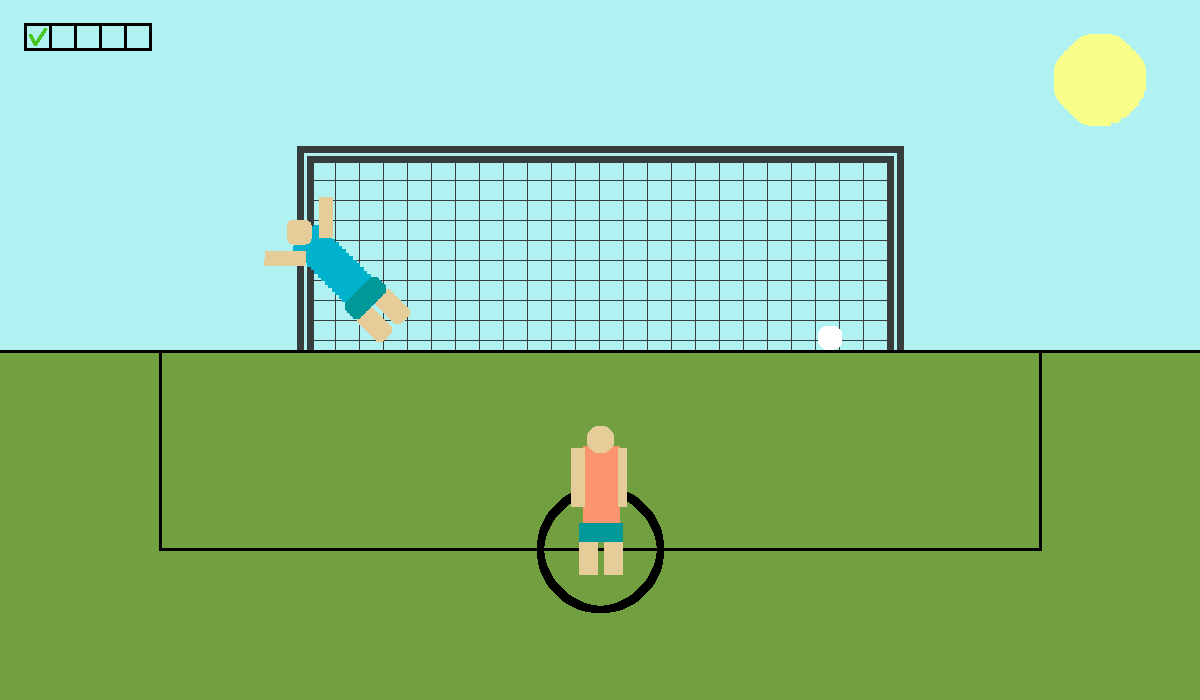

Select 1-5: 1
Height (1-170): 100


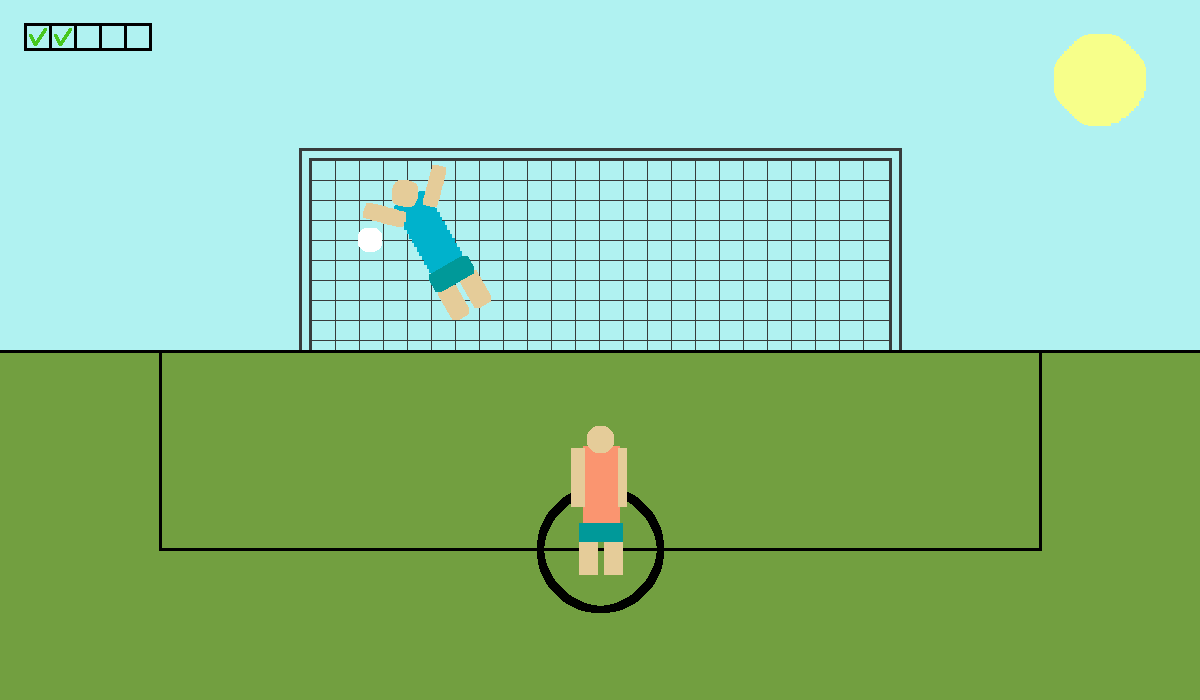

Select 1-5: 5
Height (1-170): 170


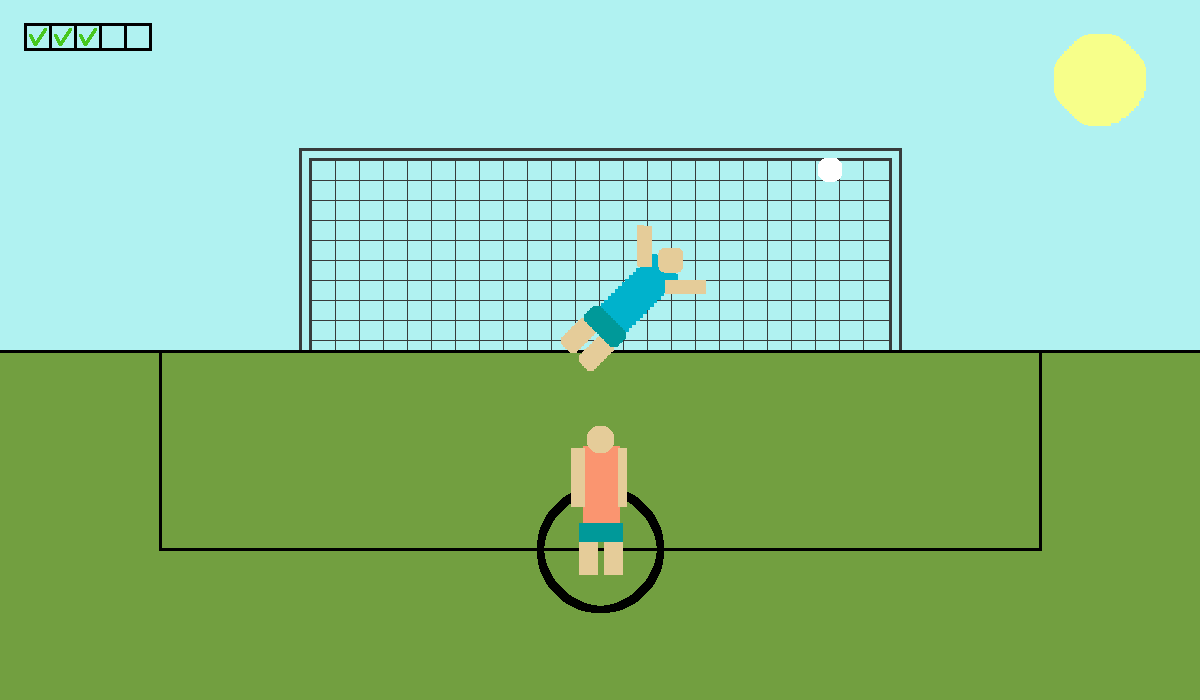

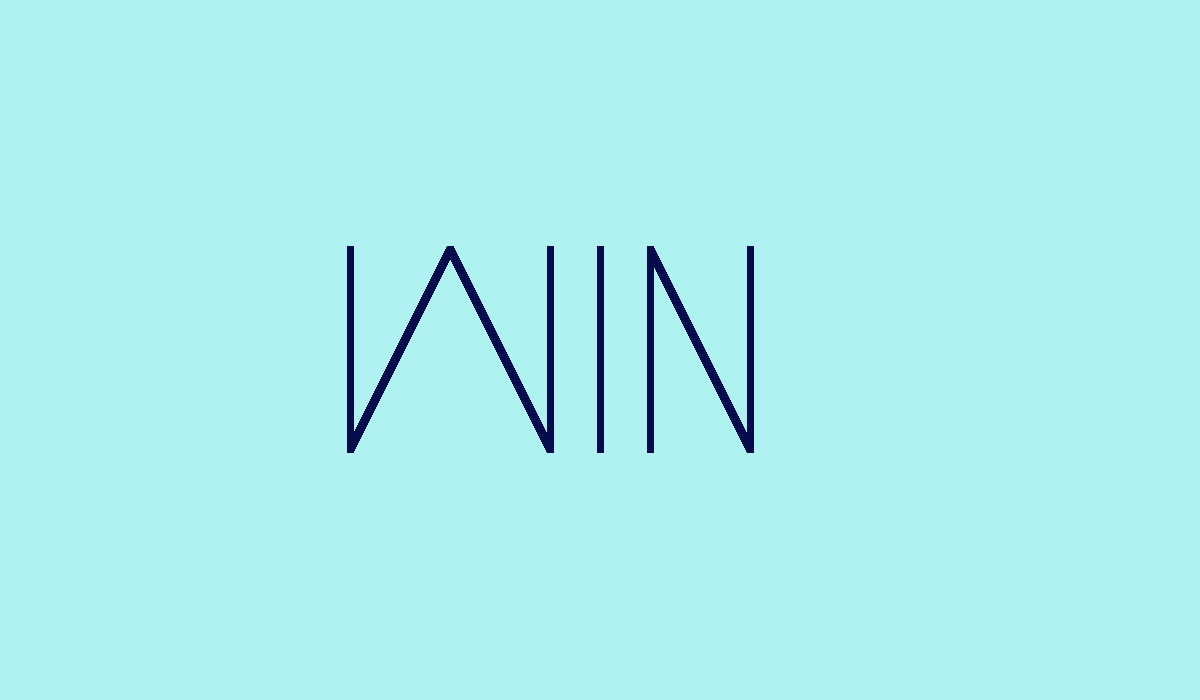

In [5]:
#@title Score 3 goals to win
from IPython.display import clear_output #render library
from IPython.display import display #render library
from PIL import Image #render library
import time
import random

goal=[]
for i in range(6):
    x=i
    if goal.count(1)==3:
        x=5
    if goal.count(0)==3:
        x=5       
    if x!=5:
        template()    
        ran=int(input("Select 1-5: "))    
        height = int(input("Height (1-170): "))
        bot_ran = random.randint(1, 5)
        d = random.randint(1, 80)
        y= 110+height #210 balanced ground
        if ran==1:a,b=-230,y #for 1
        elif ran==2:a,b=-145,y #for 2
        elif ran==3:a,b=0,y #for 3
        elif ran==4:a,b=145,y #for 4
        elif ran==5: a,b=230,y #for 5
        else:
            print("You missed the shot :(")
            goal.append(0)
            continue  
        if bot_ran == 1: c, d = -230, d
        elif bot_ran == 2: c, d = -145, d
        elif bot_ran == 3: c, d = 0, d
        elif bot_ran == 4: c, d = 145, d
        elif bot_ran == 5: c, d = 230, d

        trans = np.array([[.5, 0, a],
                        [0, .5, b],
                        [0, 0, 1]])
        
        rand_rot = [-60, -45, -30, -20, 20, 30, 45, 60]
        if bot_ran == ran:
            dg = 0
        else:
            dg = rand_rot[random.randint(0, len(rand_rot) - 1)]
  
        trans2 = np.array([[math.cos(math.radians(dg)), -math.sin(math.radians(dg)), c], #gk
                        [math.sin(math.radians(dg)), math.cos(math.radians(dg)), d],
                        [0, 0, 1]])

        trans3 = np.array([[1, 0, -100], #shooter
                            [0, 1, 10],
                            [0, 0, 1]])

        gk_move_body = np.matmul(trans2,lst_gk_body)
        gk_move_op = np.matmul(trans2,lst_gk_op)
        gk_move_pant = np.matmul(trans2,lst_gk_pant)

        shooter_move_body = np.matmul(trans3,lst_shooter_body)
        shooter_move_op = np.matmul(trans3,lst_shooter_op)
        shooter_move_pant = np.matmul(trans3,lst_shooter_pant)

        gl.glColor3f(0, 0.7, 0.8)
        for j in gk_move_body:
            gl.glBegin(gl.GL_POINTS)
            add_vertex(j[0][0],j[1][0])
            gl.glEnd()

        gl.glColor3f(0.9, 0.8, 0.6)
        for j in gk_move_op:
            gl.glBegin(gl.GL_POINTS)
            add_vertex(j[0][0],j[1][0])
            gl.glEnd()

        gl.glColor3f(0, 0.6, 0.6)
        for j in gk_move_pant:
            gl.glBegin(gl.GL_POINTS)
            add_vertex(j[0][0],j[1][0])
            gl.glEnd()

        color(245, 146, 110)
        for k in shooter_move_body:
            gl.glBegin(gl.GL_POINTS)
            add_vertex(k[0][0],k[1][0])
            gl.glEnd()

        gl.glColor3f(0.9, 0.8, 0.6)
        for k in shooter_move_op:
            gl.glBegin(gl.GL_POINTS)
            add_vertex(k[0][0],k[1][0])
            gl.glEnd()

        gl.glColor3f(0, 0.6, 0.6)
        for k in shooter_move_pant:
            gl.glBegin(gl.GL_POINTS)
            add_vertex(k[0][0],k[1][0])
            gl.glEnd()

        goaled = np.matmul(trans,cir_list[344::])
        gl.glColor3f(1, 1, 1)
    
        for i in goaled[:4800:]:
            gl.glBegin(gl.GL_POINTS)
            add_vertex(i[0][0],i[1][0])
            gl.glEnd()
        
    #GOAL CHECKING
    if height>170 or height<-10:
        miss(x)
        goal.append(0)
            
    elif (height-d) < 115 and ran==bot_ran:
        miss(x)
        goal.append(0)
        
    else:
        score(x)
        goal.append(1)           
       
    score_draw(goal)

    if x==5:
        print(" ")
        gl.glClear(gl.GL_COLOR_BUFFER_BIT)
        y=-450
        left_x, right_x = -600, 600
        color(173, 237, 236)
        while y<=450:
            DrawLine(left_x, y, right_x,y)
            y+=3
        if goal.count(1)>2:
            win()
        else:
            loss()
        img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
        img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
        display(Image.fromarray(img,'RGB'))
        break

    img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
    img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
    display(Image.fromarray(img,'RGB'))
    # clear_output(wait=True)
    time.sleep(.0001)